In [1]:
# import the required libraries

import seaborn as sns
import numpy as np # for data manipulation
from numpy import mean
from numpy import std
from numpy import nan
from numpy import isnan
import pandas as pd # for data manipulation
from pandas import read_csv
from sklearn.model_selection import train_test_split # will be used for data split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder # for preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE 
from collections import Counter
from matplotlib import pyplot

In [2]:
# load dataset
df = pd.read_csv('Data.csv')
#df = pd.read_csv('Data_without-TWOcolumns.csv')
#df = pd.read_csv('Data_without-72ROWS.csv')
print('Shape:', df.shape)# set input matrix and target column

Shape: (526, 9)


In [3]:
# count the number of missing values for each column
num_missing = (df[['Floor_Num', 'Total_Floor_Area', 'Column_Area', 'Concrete_Wall_AreaNS', 'Concrete_Wall_AreaEW','Masonry_Wall_AreaNS', 'Masonry_Wall_AreaEW', 'Captive_Columns']] == nan).sum()
# report the results
print(num_missing)

Floor_Num               0
Total_Floor_Area        0
Column_Area             0
Concrete_Wall_AreaNS    0
Concrete_Wall_AreaEW    0
Masonry_Wall_AreaNS     0
Masonry_Wall_AreaEW     0
Captive_Columns         0
dtype: int64


In [4]:
# count the number of nan values in each column
print(df[['Floor_Num', 'Total_Floor_Area', 'Column_Area', 'Concrete_Wall_AreaNS', 'Concrete_Wall_AreaEW','Masonry_Wall_AreaNS', 'Masonry_Wall_AreaEW', 'Captive_Columns']].isnull().sum())

Floor_Num               0
Total_Floor_Area        0
Column_Area             3
Concrete_Wall_AreaNS    0
Concrete_Wall_AreaEW    0
Masonry_Wall_AreaNS     0
Masonry_Wall_AreaEW     0
Captive_Columns         0
dtype: int64


In [5]:
# retrieve the numpy array
values = df[['Floor_Num', 'Total_Floor_Area', 'Column_Area', 'Concrete_Wall_AreaNS', 'Concrete_Wall_AreaEW','Masonry_Wall_AreaNS', 'Masonry_Wall_AreaEW', 'Captive_Columns']].values

In [6]:
# define imputer
imputer = SimpleImputer(missing_values=nan, strategy='mean')

In [7]:
# transform the dataset
trans_values = imputer.fit_transform(values)

In [8]:
# split dataset into inputs and outputs
#array = df.values
#print('Shape:', df.shape)# set input matrix and target column
X = trans_values[:,:]
y = df.values[:, 8]
print('Shape of df:', df.shape)
print('Shape of X:', X.shape)

Shape of df: (526, 9)
Shape of X: (526, 8)


In [9]:
# libraries for extracting important features out from the dataset
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction
test = SelectKBest(score_func=f_classif, k=6)
fit = test.fit(X, y)

# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

[9.428 1.699 3.108 0.253 0.602 0.207 2.57  2.771]


In [10]:
# summarize selected features
print(features[0:5,:])

[[2.000e+00 1.797e+03 6.210e+00 0.000e+00 9.490e+00 1.000e+00]
 [1.000e+00 5.770e+02 2.000e+00 0.000e+00 1.680e+00 0.000e+00]
 [3.000e+00 4.980e+02 1.500e+00 0.000e+00 4.000e-01 0.000e+00]
 [2.000e+00 3.100e+02 1.400e+00 0.000e+00 0.000e+00 0.000e+00]
 [3.000e+00 2.870e+02 7.400e-01 0.000e+00 1.740e+00 1.000e+00]]


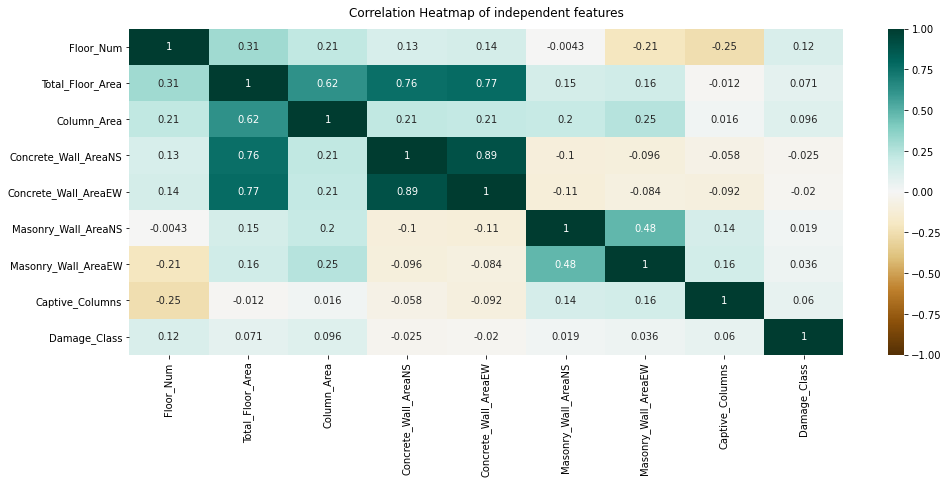

In [18]:
# Increase the size of the heatmap.
pyplot.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap of independent features', fontdict={'fontsize':12}, pad=12);

# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
pyplot.savefig('heatmap.png', dpi=300, bbox_inches='tight')

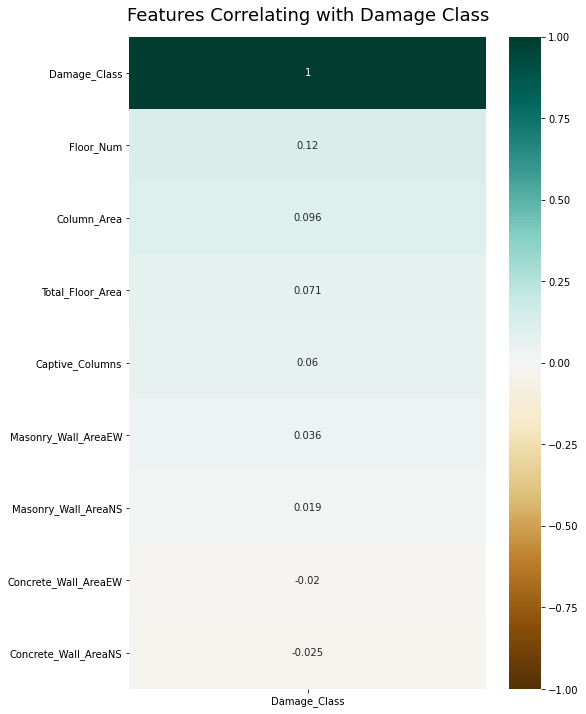

In [20]:
# Correlation of Independent Variables with the Dependent Variable
pyplot.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Damage_Class']].sort_values(by='Damage_Class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Damage Class', fontdict={'fontsize':18}, pad=16);
pyplot.savefig('heatmap_damage.png', dpi=200, bbox_inches='tight')


In [13]:
# define the scaler
trans = MinMaxScaler()
# transform the data
X= trans.fit_transform(X)

In [14]:
# encoding the dependent variable
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)